# OpenStreetMap y red de transporte

[OpenStreetMap](https://www.openstreetmap.org/) es una iniciativa colaborativa para crear el mapa editable del mundo. En otras palabras, Wikipedia es a Encyclopædia Britannica lo que OpenStreetMap es a Google Maps.

En el ejercicio de hoy revisaremos cómo calcular la ruta más corta entre dos localidades utilizando información disponible en OpenStreetMap.

Para procesar los datos de OpenStreetMap utilizaremos el módulo Python [OSMnx](https://github.com/gboeing/osmnx). OSMnx es desarrollado por [Geoff Boeing](https://twitter.com/gboeing). El análisis de la ruta más corta lo realizamos con el módulo [NetworkX](https://networkx.github.io/) (en otra sesión trabajaremos más con NetworkX).

Revisa el artículo de OSMnx: 
* Boeing, G. 2017. “OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks.” Computers, Environment and Urban Systems. 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina' # mejor resolución
%matplotlib inline

/Users/diegocaro/Library/Python/3.6/lib/python/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Descargando mapa

La función [ox.graph_from_place(...)](http://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_place#osmnx.core.graph_from_place) descarga el mapa de una zona (comuna, región o país). Por ejemplo, el de la comuna de Las Condes.

In [24]:
#G = ox.load_graphml('./scl-lascondes-network.graphml')

In [3]:
# Descargar mapa de Las Condes
G = ox.graph_from_place('Las Condes, Chile', network_type='drive')

# Guardarlo para posterior uso :)
ox.save_graphml(G, filename='./scl-lascondes-network.graphml')

La siguiente figura muestra el mapa de la comuna. Cada nodo (punto) indica alguna esquina o intersección de calles, y cada línea indica una calle.

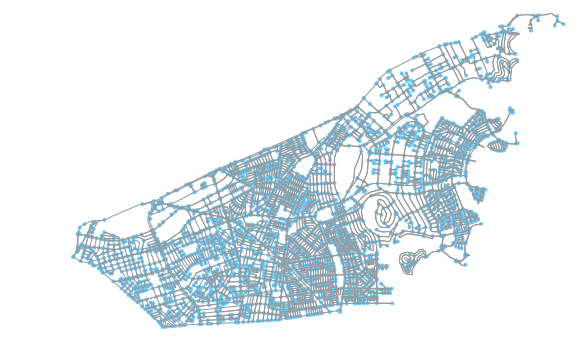

(<matplotlib.figure.Figure at 0x1113b4470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1113b4f98>)

In [4]:
ox.plot_graph(ox.project_graph(G))

## Ruta más corta

En este ejemplo calcularemos la ruta más corta entre el Metro los Domínicos y  la Universidad de Desarrollo (RESB).

Lo primero es traducir una dirección en una coordenada latitud/longitud. Este proceso se conoce como [Geocoding](https://en.wikipedia.org/wiki/Geocoding). Podemos utilizar Google Maps como Geocoder:
* Universidad del desarrollo https://www.google.cl/maps/place/Universidad+del+Desarrollo/@-33.3915515,-70.5038343,17z/data=!3m1!4b1!4m5!3m4!1s0x9662cc12d454ba79:0x4f9c85cb18cf2bb1!8m2!3d-33.391556!4d-70.5016403?hl=en
* Metro Los Domínicos https://www.google.cl/maps/place/Los+Dominicos/@-33.4078905,-70.547303,17z/data=!3m1!4b1!4m5!3m4!1s0x9662ce95f001f809:0xca310d7318a2df49!8m2!3d-33.407895!4d-70.545109?hl=en


In [19]:
# define origin/desination points then get the nodes nearest to each
origin_point = (-33.4078905,-70.547303) # metro los domínicos
destination_point = (-33.3915515,-70.5038343) # udd campus resb

Para encontrar la ruta entre dos localidades, es necesario encontrar el nodo (interesección) más cercano al punto de origen y destino. La función ``ox.get_nearest_node(...)`` lo hace por nosotros.

In [20]:
origin_node = ox.get_nearest_node(G, origin_point) 
destination_node = ox.get_nearest_node(G, destination_point)
origin_node, destination_node

(2352085721, 353082242)

La distancia más corta se calcula con la función ``nx.shortest_path_length(...)``. La respuesta se entrega en metros.

In [21]:
distance = nx.shortest_path_length(G, origin_node, destination_node, weight='length')
distance

5670.5507159881618

In [22]:
# find the shortest path between origin and destination nodes
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
str(route)

'[2352085721, 265044507, 2352085722, 1878628115, 4425970676, 4761978231, 2781524363, 1862408639, 2781524531, 2781524378, 4392601304, 1862408598, 264422929, 265054421, 263389479, 2616386595, 250439302, 1379556480, 250424846, 263412183, 2616386603, 2616386587, 2616386591, 250424855, 265055333, 250424860, 250446147, 250424872, 2036642877, 250446141, 250424886, 1125506403, 263393123, 263392669, 1125506367, 1125506384, 1125506387, 263434112, 250424891, 1125506519, 250424896, 263433714, 250424898, 263433712, 263433881, 250446053, 263433885, 250446071, 250424903, 250439378, 4505102208, 250439305, 2112253752, 250439344, 3913371942, 3913371926, 250439335, 250439348, 250439350, 2761475503, 250439353, 256370400, 1356258995, 357559959, 353083355, 353083205, 353083136, 353082929, 353082243, 353082242]'

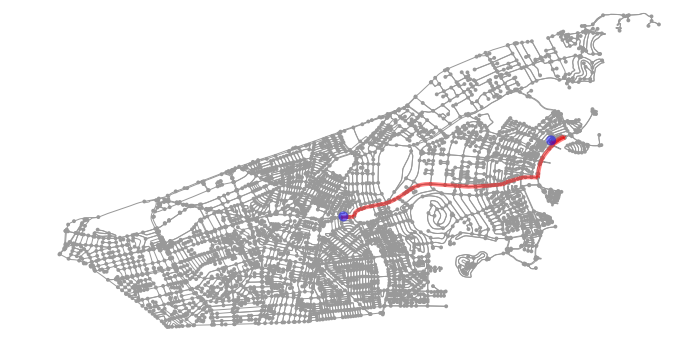

In [23]:
# plot the route showing origin/destination lat-long points in blue
fig, ax = ox.plot_graph_route(G, route, origin_point=origin_point, destination_point=destination_point)

# Ejercicios

1. Calcular la distancia más corta entre tu casa y la universidad.
2. Calcular el promedio de distancia entre hogar y trabajo/estudio de las 5 personas que más te importan.
3. ¿Qué otros usos se le pueden dar a estos datos?
